# <span class="bg-primary">7. PYTHON POUR DATASCIENCE</span>

In [ ]:
import os
os.chdir('C:/Users/PC Maison/7-OPENCLASSROOM/OC-COURS-7-PYTHON_POUR_DATA_SCIENCES')

In [1]:
# jeu de MONTYHALL : 3 portes derrière l'une d'elles un trésor

In [46]:
# Pour afficher les graphiques dans la continuité du code, 
# et non pas dans une fenêtre à part:
%matplotlib inline

# Pour utiliser la fonction randint, qui génère des nombres
# entiers de façon aléatoire:
# from random import randint, seed
import random

# Un Enum est une structure de données qui consiste en un 
# ensemble d'éléments nommés. Une variable de ce type peut
# avoir comme valeur un de ces éléments.
from enum import Enum

# Pour pouvoir afficher des graphiques:
import matplotlib.pyplot as plt

import numpy as np

In [3]:
# Ici nous définissons une sous-classe de Enum, qui contiendra 
# les stratégies possibles.
class Strategie(Enum):
    CHANGER = 1
    GARDER = 2

In [61]:
# Utilise l'horloge système pour initialiser le générateur de 
# nombres pseudo-aléatoires.
seed()

def play_game(strategie):
    '''Simule une partie du jeu Monty Hall.
    
    Cette fonction simule le choix de la porte par le participant, 
    l'élimination d'une mauvaise porte par le présentateur, et le 
    choix final. Elle ne retourne que le résultat de la partie, parce 
    que nous n'aurons besoin que du résultat pour effectuer nos calculs.
    
    Args:
        strategie (Strategie): La stratégie du joueur
        
    Returns:
        bool: Le joueur a-t-il gagné?
    '''

    portes = [0, 1, 2]
    
    bonne_porte = randint(0,2)
    
    # Choix du joueur
    premier_choix = randint(0,2)
    
    # Il nous reste deux portes
    portes.remove(premier_choix)
    
    # Le présentateur élimine une porte
    if premier_choix == bonne_porte:
        portes.remove(portes[randint(0,1)])
    else:
        portes = [bonne_porte]
    
    deuxieme_choix = 0
    
    # Le deuxieme choix depend de la strategie
    if strategie == Strategie.CHANGER:
        deuxieme_choix = portes[0]
    elif strategie == Strategie.GARDER:
        deuxieme_choix = premier_choix
    else:
        raise ValueError("Stratégie non reconnue!")
    
    return deuxieme_choix == bonne_porte

In [62]:
# test de la fonction
play_game(Strategie.CHANGER)

True

In [63]:
# fonction qui lance le jeu autant qu'on veut et retourne le résultat du jeu
# dans une liste
def play(strategie, nb_tours):
    '''Simule une suite de tours du jeu.
    
    Cette fonction renvoie les résultats de plusieurs parties
    du jeu Monty Hall sous forme d'une liste de gains par le 
    joueur.
    
    Args:
        strategie (Strategie): La strategie du joueur
        nb_tours (int): Nombre de tours
        
    Returns:
        list: Liste des gains du joueurs à chaque partie
    '''
    
    # Ceci est une liste en compréhension. Pour en savoir plus, consulter 
    # le cours "Apprenez à programmer en Python" sur OpenClassrooms
    return [1 if play_game(strategie) else 0 for i in range(nb_tours)]

In [64]:
# analyse des résultats selon la stratégie

print("En changeant de porte, le joueur a gagné {} sur 10000 parties."
      .format(sum(play(Strategie.CHANGER, 10000))))
      
print("En gardant son choix initial, le joueur a gagné {} sur 10000 parties."
      .format(sum(play(Strategie.GARDER, 10000))))

En changeant de porte, le joueur a gagné 6615 sur 10000 parties.
En gardant son choix initial, le joueur a gagné 3278 sur 10000 parties.


# <span class="bg-info">PLOT</span>

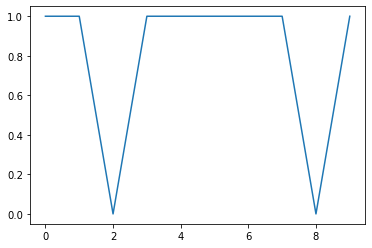

In [8]:
# visualisation des résultats

# pour 10 parties
# plot renvoie un objet, que l'on pourra manipuler plus tard pour
# personnaliser le graphique
plot = plt.plot(play(Strategie.CHANGER, 10))

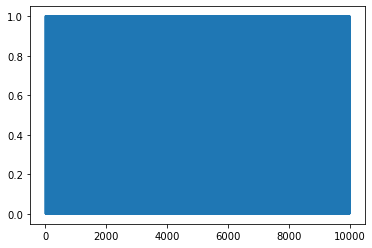

In [9]:
# pour 10000 parties
plot = plt.plot(play(Strategie.CHANGER, 10000))
# plot relie les points entre eux

# <span class="bg-info">SCATTER</span>

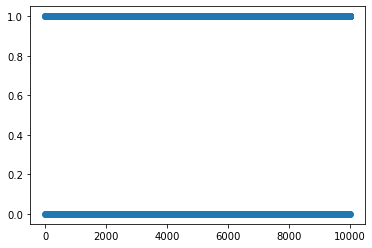

In [10]:
plot = plt.scatter(range(10000), play(Strategie.CHANGER, 10000))
# scatter ne relie pas les points entre eux

# <span class="bg-info">BAR</span>

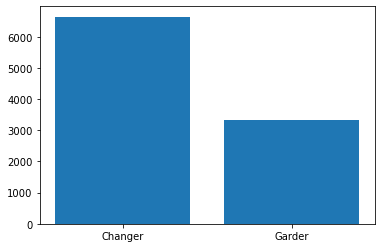

In [11]:
plot = plt.bar([1,2],[sum(play(Strategie.CHANGER, 10000)), 
               sum(play(Strategie.GARDER, 10000))], 
        tick_label=["Changer","Garder"])
# bar doit avoir les coordonnées des colonnes [1, 2] qu'on peut renommer dans 
# ticklabel

In [13]:
# Visualiser une liste de nombres

gains_changer = [] # gain pour ceux qui changent deporte
gains_garder = []  # gain pour ceux qui ne changent deporte
samples =  [1000, 10000, 20000, 50000, 80000, 100000]
for tours in samples:
    gains_changer.append(play(Strategie.CHANGER, tours))
    gains_garder.append(play(Strategie.GARDER, tours))

Text(0.5, 1.0, 'Moyenne de chaque gains en fonction du nombre de parties')

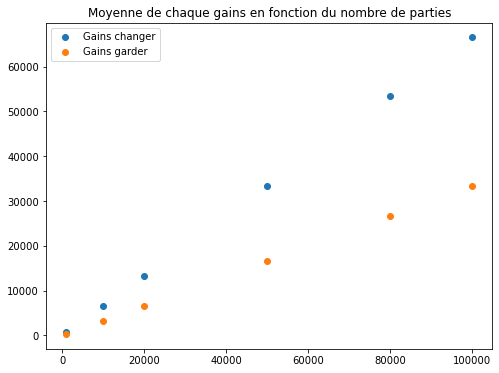

In [67]:
figure = plt.figure(figsize=(8,6))
plot = plt.scatter(samples, [sum(x) for x in gains_changer], label='Gains changer')
plot = plt.scatter(samples, [sum(x) for x in gains_garder], label='Gains garder')
plt.legend()
plt.title('Moyenne de chaque gains en fonction du nombre de parties')

In [92]:
# Utilise l'horloge système pour initialiser le générateur de 
# nombres pseudo-aléatoires.
seed()

def play_game_loe():
    '''Simule une partie du jeu Monty Hall.
    
    Cette fonction simule le choix de la porte par le participant, 
    l'élimination d'une mauvaise porte par le présentateur, et le 
    choix final. Elle ne retourne que le résultat de la partie, parce 
    que nous n'aurons besoin que du résultat pour effectuer nos calculs.
    
    Args:
        strategie (Strategie): La stratégie du joueur
        
    Returns:
        bool: Le joueur a-t-il gagné?
    '''

    portes = [0, 1, 2]
    
    bonne_porte = randint(0,2)
    
    # Choix du joueur
    premier_choix = randint(0,2)
#     print('premier_choix=',premier_choix)
    
    # Il nous reste deux portes
    portes.remove(premier_choix)
#     print('portes_restantes=',portes)

    deuxieme_choix = 0
    
    # Le présentateur élimine une porte
    if premier_choix == bonne_porte:
        portes.remove(portes[randint(0,1)])
#         print('premier_choix == bonne_porte, porte restante=',portes)
        portes_restantes = portes
        # choix au hasard entre les 2 premieres portes
        deuxieme_choix = random.choice(portes_restantes)
#         print('deuxieme_choix=',deuxieme_choix)
    else:
        portes = [bonne_porte]
#         print('premier_choix != bonne_porte, porte restante=',portes)

#     print('bonne_porte=',bonne_porte)
    
    return deuxieme_choix == bonne_porte

In [93]:
def play_loe(nb_tours):
    '''Simule une suite de tours du jeu.
    
    Cette fonction renvoie les résultats de plusieurs parties
    du jeu Monty Hall sous forme d'une liste de gains par le 
    joueur.
    
    Args:
        nb_tours (int): Nombre de tours
        
    Returns:
        list: Liste des gains du joueurs à chaque partie
    '''
    
    # Ceci est une liste en compréhension. Pour en savoir plus, consulter 
    # le cours "Apprenez à programmer en Python" sur OpenClassrooms
    return [1 if play_game_loe() else 0 for i in range(nb_tours)]

In [94]:
gains_changer = [] # gain pour ceux qui changent deporte
gains_garder = []  # gain pour ceux qui ne changent deporte
gains_hasard = []
samples =  [1000, 10000, 20000, 50000, 80000, 100000]
for tours in samples:
    gains_changer.append(play(Strategie.CHANGER, tours))
    gains_garder.append(play(Strategie.GARDER, tours))
    gains_hasard.append(play_loe(tours))

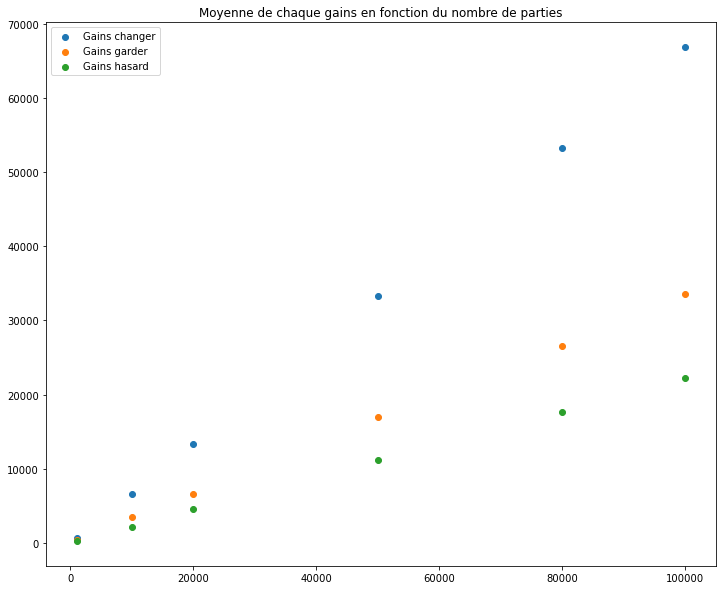

In [95]:
figure = plt.figure(figsize=(12,10))
plt.scatter(samples, [sum(x) for x in gains_changer], label='Gains changer')
plt.scatter(samples, [sum(x) for x in gains_garder], label='Gains garder')
plt.scatter(samples, [sum(x) for x in gains_hasard], label='Gains hasard')
plt.legend()
plt.title('Moyenne de chaque gains en fonction du nombre de parties')
plt.show()

# <span class="bg-info">DISTRIBUTION GAUSSIENNE ou NORMALE</span>

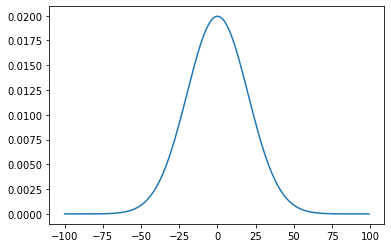

In [96]:
%matplotlib inline  
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, pi, exp

domaine = range(-100,100)
mu = 0
sigma = 20

# Notez l'utilisation du mot clé lambda. Il est très bien expliqué dans le cours
# "Apprenez à programmer en Python" sur OpenClassrooms.
f = lambda x : 1/(sqrt(2*pi*pow(sigma,2))) * exp(-pow((x-mu),2)/(2*pow(sigma,2)))

y = [f(x) for x in domaine]
plot = plt.plot(domaine, y)

# <span class="bg-info">THEOREME CENTRAL LIMITE</span>

In [ ]:
# Intuitivement, ce théorème déclare que toute somme de variables aléatoires 
# indépendantes et identiquement distribuées tend vers une variable aléatoire 
# gaussienne.

## Générez des réalisations de variables aléatoires avec Numpy

In [97]:
# Nous allons considérer 100 variables aléatoires, 
# chacune avec 200 échantillons.
matrice_aleatoire = np.random.rand(100,200)

sommes = np.sum(matrice_aleatoire,0)

In [98]:
print("La taille de la variable sommes est {}.".format(sommes.shape))

La taille de la variable sommes est (200,).


## Visualisation

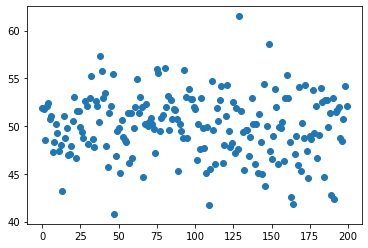

In [99]:
plot = plt.scatter(range(200), sommes)

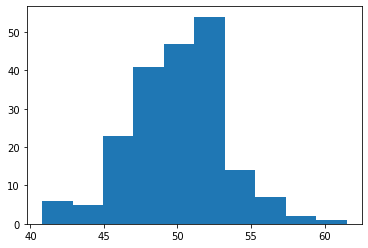

In [100]:
plot = plt.hist(sommes)

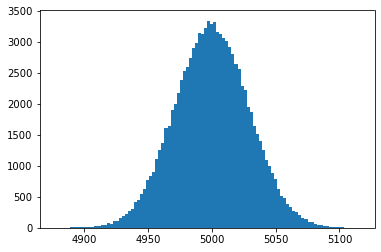

In [101]:
matrice_aleatoire = np.random.rand(10000,100000)
sommes = np.sum(matrice_aleatoire,0)
plot = plt.hist(sommes, bins=100)

## Calculer les propriétés d'un échantillon

In [102]:
print("La moyenne empirique de notre distribution est {}."
      .format(np.mean(sommes)))
print("La moyenne empirique de la variable généré par la fonction rand est {}."
      .format(np.mean(np.random.rand(100000))))
print("La variance empirique de notre distribution est {}."
      .format(np.var(sommes)))
print("La variance empirique de la variable généré par la fonction rand est {}."
      .format(np.var(np.random.rand(100000))))

La moyenne empirique de notre distribution est 4999.948814985893.
La moyenne empirique de la variable généré par la fonction rand est 0.5003041052523685.
La variance empirique de notre distribution est 841.2707229064317.
La variance empirique de la variable généré par la fonction rand est 0.08316353294435001.


# <span class="bg-info">TP :TRANSFORMER LE JEU MONTYHALL PYTHON EN NUMPY</span>

In [ ]:
: import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
[2]: N_TRIALS = 1000
prizes = np.random.randint(0,3, size=(N_TRIALS)) # Attention, 3
# pour numpy, et non pas 2
first_choices = np.random.randint(0,3, size=(N_TRIALS))
# Si le joueur change de porte, il ne gagne que si son
# premier choix n'était pas le bon
switching_player_gains = (prizes!=first_choices).astype(int)
keeping_player_gains = (prizes==first_choices).astype(int)
[3]: plot = plt.bar([1,2],[switching_player_gains.sum(),
keeping_player_gains.sum()],
tick_label=["Changer","Garder"])


# <span class="bg-info">NUMPY</span>

## Créez des tableaux Numpy

In [1]:
import numpy as np

In [2]:
# Tableau d'entiers:
np.array([1, 4, 2, 5, 3])

array([1, 4, 2, 5, 3])

In [3]:
np.array([3.14, 4, 2, 3])

array([3.14, 4.  , 2.  , 3.  ])

In [4]:
# en spécifiant le type
np.array([1, 2, 3, 4], dtype='float32')

array([1., 2., 3., 4.], dtype=float32)

In [5]:
# Une liste de listes est transformée en un tableau multi-dimensionnel
np.array([range(i, i + 3) for i in [2, 4, 6]])

array([[2, 3, 4],
       [4, 5, 6],
       [6, 7, 8]])

## Créer les tableaux directement


In [7]:
# Un tableau de longueur 10, rempli d'entiers qui valent 0
np.zeros(10, dtype=int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [8]:
# Un tableau de taille 3x5 rempli de nombres à virgule flottante de valeur 1
np.ones((3, 5), dtype=float)

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [9]:
# Un tableau 3x5 rempli de 3,14
np.full((3, 5), 3.14)

array([[3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14]])

In [10]:
# Un tableau rempli d'une séquence linéaire
# commençant à 0 et qui se termine à 20, avec un pas de 2
np.arange(0, 20, 2)

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [11]:
# Un tableau de 5 valeurs, espacées uniformément entre 0 et 1
np.linspace(0, 1, 5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [13]:
# Celle-ci vous la conaissez déjà! Essayez aussi "randint" et "normal"
np.random.random((3, 3))

array([[0.38691965, 0.8622367 , 0.31284997],
       [0.84807867, 0.20013987, 0.18833317],
       [0.70350977, 0.14411297, 0.8053673 ]])

In [20]:
# randint : entier entre 0 et 2 taille 3*3
np.random.randint(3, size=(3,3))

array([[0, 1, 2],
       [2, 2, 1],
       [2, 0, 2]])

In [22]:
# "normal" : un array de 7 valeurs issues d'une loi normale avec moyenne=5 
# et écart type=2
np.random.normal(5, 2, 7)

array([5.40821321, 6.38062495, 5.27442927, 0.56509652, 5.06935822,
       0.92765695, 2.27210439])

In [14]:
# La matrice identité de taille 3x3 
# (matrice identité : https://fr.wikipedia.org/wiki/Matrice_identit%C3%A9)
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

## Les propriétés des tableaux

In [23]:
np.random.seed(0)
x1 = np.random.randint(10, size=6)  # Tableau de dimension 1

print("nombre de dimensions de x1: ", x1.ndim)
print("forme de x1: ", x1.shape)
print("taille de x1: ", x1.size)
print("type de x1: ", x1.dtype)

nombre de dimensions de x1:  1
forme de x1:  (6,)
taille de x1:  6
type de x1:  int32


## Indexation et Slicing

## Accéder à un seul élément

In [25]:
# voir tout le tableau
print(x1)

[5 3 3 3 7 9]


In [27]:
# Pour accéder au premier élément
print(x1[0])

5


In [28]:
# Pour accéder au dernier élément
print(x1[-1])

9


In [29]:
x2 = np.random.randint(10, size=(3, 4))  # Tableau de dimension 2
print(x2[0,1])

1


In [30]:
# On peut aussi modifier les valeurs
x1[1] = "1000"
print(x1)

[   5 1000    3    3    7    9]


In [31]:
# Attention au type
x1[1] = 3.14
print(x1)

[5 3 3 3 7 9]


## Accéder à plusieurs éléments

In [32]:
print(x1[:5])  # Les cinq premiers éléments

[5 3 3 3 7]


In [33]:
print(x1[5:])  # Les éléments à partir de l'index 5

[9]


In [34]:
print(x1[::2])  # Un élément sur deux

[5 3 7]


## Concaténation

In [35]:
x = np.array([1, 2, 3])
y = np.array([3, 2, 1])
np.concatenate([x, y])

array([1, 2, 3, 3, 2, 1])

In [36]:
x = np.array([1, 2, 3])
grid = np.array([[9, 8, 7],
                 [6, 5, 4]])

np.vstack([x, grid])

array([[1, 2, 3],
       [9, 8, 7],
       [6, 5, 4]])

## Opérations sur les tableaux Numpy

In [38]:
def calcul_inverse(values):
    output = np.empty(len(values))
    for i in range(len(values)):
        output[i] = 1.0 / values[i]
    return output
        
values = np.random.randint(1, 10, size=5)
print(calcul_inverse(values))

tableau_large = np.random.randint(1, 100, size=1000000)

# Ceci est une facilité des notebooks jupyter pour 
# mesurer le temps d'exécution d'une instruction
%timeit calcul_inverse(tableau_large)

[0.33333333 0.25       0.11111111 0.5        0.25      ]
1.66 s ± 8.87 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [39]:
%timeit (1.0 / tableau_large)

2.19 ms ± 195 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Les fonctions universelles

In [40]:
# Il y a tout d'abord des opération mathématiques simples
x = np.arange(4)
print("x     =", x)
print("x + 5 =", x + 5)
print("x - 5 =", x - 5)
print("x * 2 =", x * 2)
print("x / 2 =", x / 2)
print("x // 2 =", x // 2)  # Division avec arronid

x     = [0 1 2 3]
x + 5 = [5 6 7 8]
x - 5 = [-5 -4 -3 -2]
x * 2 = [0 2 4 6]
x / 2 = [0.  0.5 1.  1.5]
x // 2 = [0 0 1 1]


In [41]:
x = [-2, -1, 1, 2]
print("La valeur absolue: ", np.abs(x))
print("Exponentielle: ", np.exp(x))
print("Logarithme: ", np.log(np.abs(x)))

La valeur absolue:  [2 1 1 2]
Exponentielle:  [0.13533528 0.36787944 2.71828183 7.3890561 ]
Logarithme:  [0.69314718 0.         0.         0.69314718]


## Opérations Booléennes

In [46]:
x = np.random.rand(3,3)
x

array([[0.82235473, 0.21737642, 0.21458453],
       [0.75687255, 0.891968  , 0.91821687],
       [0.85946   , 0.50718748, 0.10660595]])

In [47]:
x > 0.5

array([[ True, False, False],
       [ True,  True,  True],
       [ True,  True, False]])

In [48]:
# les index de ceux pour qui x>0.5
np.where(x > 0.5)

(array([0, 1, 1, 1, 2, 2], dtype=int64),
 array([0, 0, 1, 2, 0, 1], dtype=int64))

## Agrégation

In [49]:
# somme
L = np.random.random(100)
np.sum(L)

49.86187919435378

In [50]:
%timeit sum(tableau_large)
%timeit np.sum(tableau_large)

115 ms ± 2.67 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
326 µs ± 1.53 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [51]:
M = np.random.random((3, 4))
print(M)
# Notez la syntax variable.fonction au lieu de 
# np.fonction(variable). Les deux sont possibles si
# la variable est un tableau Numpy.
print("La somme de tous les éléments de M: ", M.sum())
print("Les sommes des colonnes de M: ", M.sum(axis=0))
print("Les sommes des lignes de M: ", M.sum(axis=1))

[[0.08322081 0.56234571 0.68861915 0.77471485]
 [0.79453477 0.74340024 0.73293624 0.052712  ]
 [0.40630721 0.02055225 0.28562223 0.04923227]]
La somme de tous les éléments de M:  5.194197723470655
Les sommes des colonnes de M:  [1.2840628  1.3262982  1.70717762 0.87665911]
Les sommes des lignes de M:  [2.10890052 2.32358324 0.76171396]


In [55]:
# pour calculer l'écart type
np.std(M)

0.30586566488828565

In [54]:
# pour trouver l'index de l'élément minimum
np.argmin(M)

9

In [58]:
# pour calculer des statistiques sur les éléments.
np.percentile(M, 50, axis=0)  

array([0.40630721, 0.56234571, 0.68861915, 0.052712  ])

In [59]:
np.percentile(M, 50, axis=1)  

array([0.62548243, 0.73816824, 0.16742725])

## Broadcasting

In [60]:
a = np.array([0, 1, 2])
b = np.array([5, 5, 5])
a + b

array([5, 6, 7])

In [61]:
a + 5

array([5, 6, 7])

In [64]:
M = np.ones((3, 3))
print("M vaut: \n", M)
print("a vaut: \n", a)
print("M+a vaut: \n", M+a)

M vaut: 
 [[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
a vaut: 
 [0 1 2]
M+a vaut: 
 [[1. 2. 3.]
 [1. 2. 3.]
 [1. 2. 3.]]


In [65]:
a = np.arange(3)
print('a :', a)
# La ligne suivante crée une matrice de taille 3x1
# avec trois lignes et une colonne.
b = np.arange(3)[:, np.newaxis]
print('b :', b)
a+b
print('a+b :', a+b)

a : [0 1 2]
b : [[0]
 [1]
 [2]]
a+b : [[0 1 2]
 [1 2 3]
 [2 3 4]]


# <span class="bg-info">MATPLOTLIB</span>

In [66]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

## Réaliser des graphiques simples

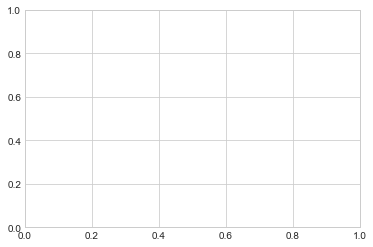

In [67]:
fig = plt.figure()
ax = plt.axes()

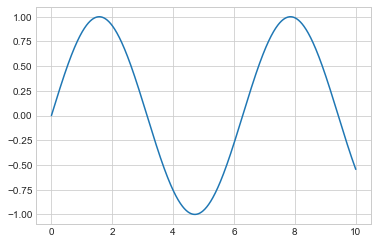

In [68]:
fig = plt.figure()
ax = plt.axes()
x = np.linspace(0, 10, 1000)
ax.plot(x, np.sin(x));

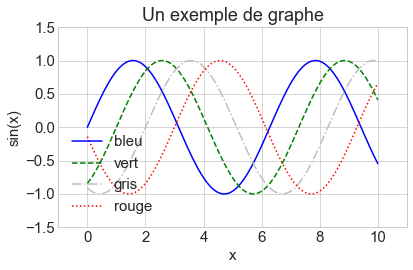

In [71]:
# Chanegr la taille de police par défaut
plt.rcParams.update({'font.size': 15})

fig = plt.figure()
ax = plt.axes()
# Couleur spécifiée par son nom, ligne solide
plt.plot(x, np.sin(x - 0), color='blue', linestyle='solid', label='bleu')
# Nom court pour la couleur, ligne avec des traits
plt.plot(x, np.sin(x - 1), color='g', linestyle='dashed', label='vert')
# Valeur de gris entre 0 et 1, des traits et des points
plt.plot(x, np.sin(x - 2), color='0.75', linestyle='dashdot', label='gris')
# Couleur spécifié en RGB, avec des points
plt.plot(x, np.sin(x - 3), color='#FF0000', linestyle='dotted', label='rouge')

# Les limites des axes, essayez aussi les arguments 'tight' et 'equal' 
# pour voir leur effet
plt.axis([-1, 11, -1.5, 1.5]);

# Les labels
plt.title("Un exemple de graphe")

# La légende est générée à partir de l'argument label de la fonctio
# plot. L'argument loc spécifie le placement de la légende
plt.legend(loc='lower left');

# Titres des axes
ax = ax.set(xlabel='x', ylabel='sin(x)')

plt.tight_layout()

## Visualiser l'incertitude

## Données discrètes

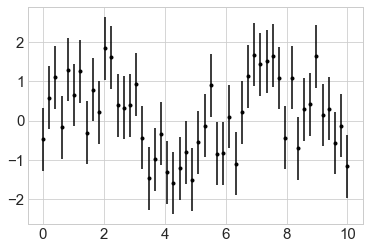

In [72]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x, y, yerr=dy, fmt='.k');

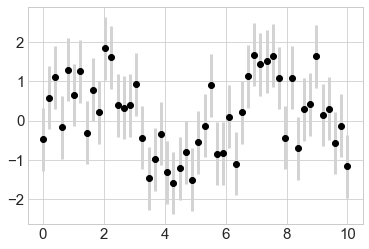

In [73]:
plt.errorbar(x, y, yerr=dy, fmt='o', color='black',
             ecolor='lightgray', elinewidth=3, capsize=0);

## Données continues

In [74]:
# en utilisant la fonction  plot  conjointement avec la fonction  fill_between

## Personnalisation et sous-graphes

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast']


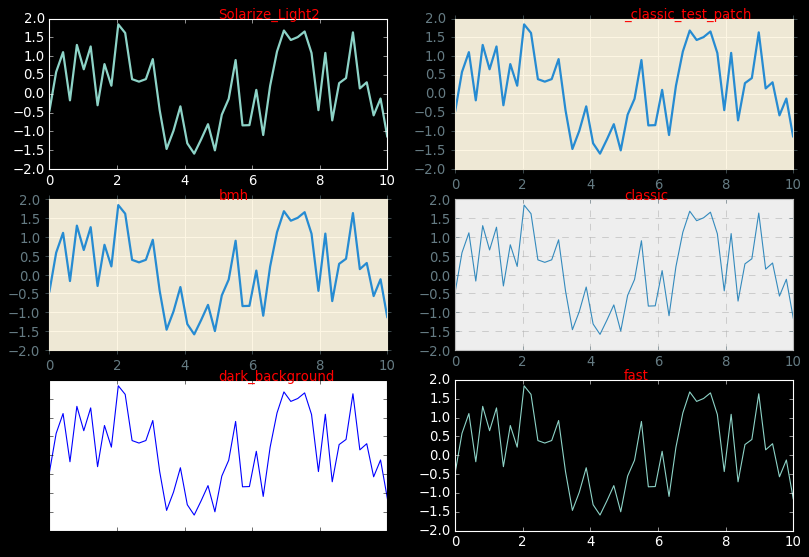

In [78]:
print(plt.style.available[:6])

# Notez la taille de la figure
fig = plt.figure(figsize=(12,8))
for i in range(6):
    # On peut ajouter des sous graphes ainsi
    fig.add_subplot(3,2,i+1)
    plt.style.use(plt.style.available[i])
    plt.plot(x, y)
    
    # Pour ajouter du texte
    plt.text(s=plt.style.available[i], x=5, y=2, color='red')

plt.show()    

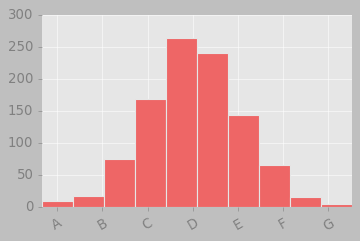

In [80]:
# On peut aussi tout personnaliser à la main
x = np.random.randn(1000)

plt.style.use('classic')
fig=plt.figure(figsize=(5,3))
ax = plt.axes(facecolor='#E6E6E6')

# Afficher les ticks en dessous de l'axe
ax.set_axisbelow(True)

# Cadre en blanc
plt.grid(color='w', linestyle='solid')

# Cacher le cadre
# ax.spines contient les lignes qui entourent la zone où les 
# données sont affichées.
for spine in ax.spines.values():
    spine.set_visible(False)
    
# Cacher les marqueurs en haut et à droite
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()

# Nous pouvons personnaliser les étiquettes des marqueurs
# et leur appliquer une rotation
marqueurs = [-3, -2, -1, 0, 1, 2, 3]
xtick_labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
plt.xticks(marqueurs, xtick_labels, rotation=30)

# Changer les couleur des marqueurs
ax.tick_params(colors='gray', direction='out')
for tick in ax.get_xticklabels():
    tick.set_color('gray')
for tick in ax.get_yticklabels():
    tick.set_color('gray')
    
# Changer les couleur des barres
ax.hist(x, edgecolor='#E6E6E6', color='#EE6666');

# <span class="bg-info">SEABORN</span>

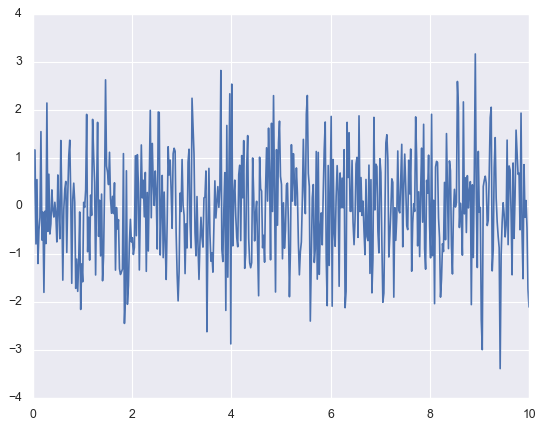

In [81]:
import seaborn as sns
sns.set()

x = np.linspace(0, 10, 500)
y = np.random.randn(500)
plt.plot(x,y)

## DISTPLOT

C:\Users\Outils\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


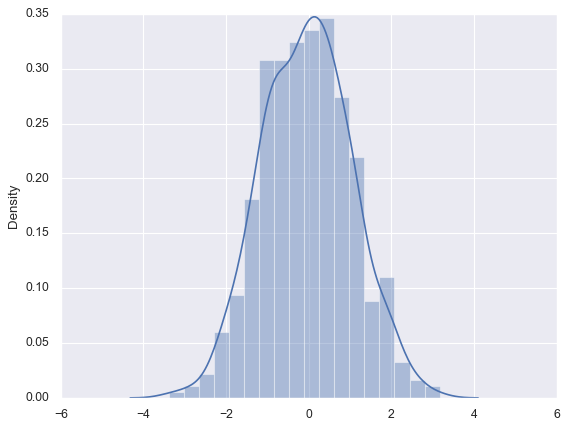

In [83]:
# Histogramme d'un échantillon + estimer la distribution dont l'échantillon 
# est issu
sns.distplot(y, kde=True);

##  PAIRPLOT

In [84]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


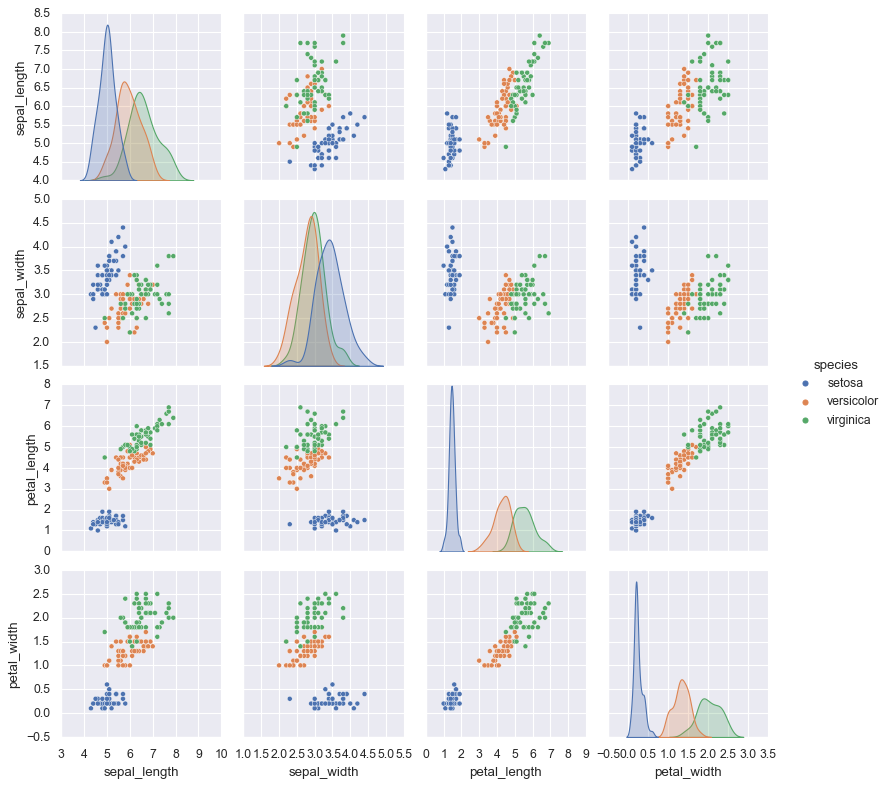

In [85]:
# relation entre les variables
sns.pairplot(iris, hue='species', height=2.5);

## JOINTPLOT

C:\Users\Outils\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


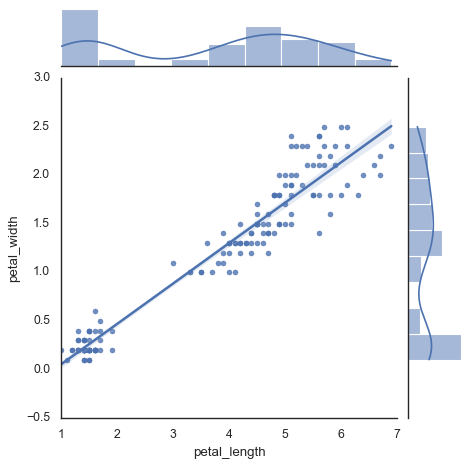

In [86]:
# DISTRIBUTION JOINTE DE 2 VARIABLES
with sns.axes_style('white'):
    sns.jointplot("petal_length", "petal_width", data=iris, kind='reg')

## TP HUBBLE

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [91]:
path='C:/Users/PC Maison/7-OPENCLASSROOM/OC-COURS-7-PYTHON_POUR_DATA_SCIENCES/'
hubble = pd.read_csv(path + 'hubble.csv')

In [92]:
hubble.describe()

,distance,recession_velocity
count,24.000000,24.000000
mean,0.911375,373.125000
std,0.645496,371.254666
min,0.032000,-220.000000
25%,0.406250,165.000000
50%,0.900000,295.000000
75%,1.175000,537.500000
max,2.000000,1090.000000


In [94]:
hubble.columns

Index(['distance', 'recession_velocity'], dtype='object')

In [96]:
hubble.shape

(24, 2)

In [98]:
hubble.distance.shape

(24,)

In [105]:
from sklearn.linear_model import LinearRegression

X = hubble.distance.values.reshape(-1,1)
Y = hubble.recession_velocity

lr = LinearRegression()
lr.fit(X, Y)
y_pred=lr.predict(X)

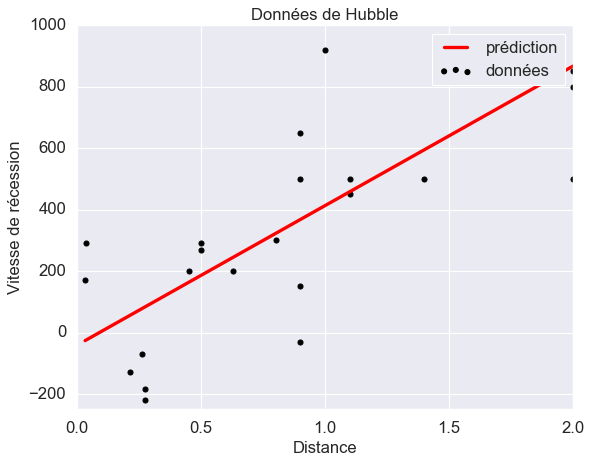

In [107]:
BIGGER_SIZE = 15

plt.rc('font', size=BIGGER_SIZE) # taille de texte par défaut
plt.rc('axes', titlesize=BIGGER_SIZE) # taille des titres des axes
plt.rc('axes', labelsize=BIGGER_SIZE) # taille des labels des axes
plt.rc('xtick', labelsize=BIGGER_SIZE) # taille des ticks des ascisses

plt.rc('ytick', labelsize=BIGGER_SIZE) # taille des ticks des ordonnées
plt.rc('legend', fontsize=BIGGER_SIZE) # taille de la légende
plt.rc('figure', titlesize=BIGGER_SIZE) # taille du titre
plt.figure()

plt.title("Données de Hubble")
plt.scatter(X, Y, color='black', label="données")
plt.plot(X, y_pred, color='red', linewidth=3, label="prédiction")
plt.xlabel("Distance")
plt.ylabel("Vitesse de récession")
plt.legend()
plt.axis([0.0, 2.0, -250, 1000]);

plt.show()

# <span class="bg-info">PANDAS</span>

In [108]:
import numpy as np
un_panda_numpy = np.array([100,5,20,80])
un_panda_numpy

array([100,   5,  20,  80])

In [109]:
famille_panda = [
    np.array([100, 5  , 20, 80]), # maman panda
    np.array([50 , 2.5, 10, 40]), # bébé panda
    np.array([110, 6  , 22, 80]), # papa panda
]

In [110]:
# liste de liste
famille_panda_numpy = np.array(famille_panda)
famille_panda_numpy

array([[100. ,   5. ,  20. ,  80. ],
       [ 50. ,   2.5,  10. ,  40. ],
       [110. ,   6. ,  22. ,  80. ]])

In [111]:
famille_panda_numpy[2, 0] # taille des pattes de papa panda, à la manière numpy

110.0

In [112]:
famille_panda_numpy[:, 0]

array([100.,  50., 110.])

## Dataframe

In [113]:
import pandas as pd
famille_panda_df = pd.DataFrame(famille_panda)
famille_panda_df

,0,1,2,3
0,100.0,5.0,20.0,80.0
1,50.0,2.5,10.0,40.0
2,110.0,6.0,22.0,80.0


## Ajouter le nom des index et colonnes au dataframe

In [ ]:
famille_panda_df = pd.DataFrame(famille_panda_numpy,
                                index = ['maman', 'bebe', 'papa'],
                                columns = ['pattes', 'poil', 'queue', 'ventre'])
famille_panda_df

## Récupérer des doonées

In [117]:
famille_panda_df.ventre

maman    80.0
bebe     40.0
papa     80.0
Name: ventre, dtype: float64

In [116]:
# OU : identique
famille_panda_df["ventre"]

maman    80.0
bebe     40.0
papa     80.0
Name: ventre, dtype: float64

## Boucler sur tous les lignes : iterrows()

In [118]:
for ind_ligne, contenu_ligne in famille_panda_df.iterrows():
    print("Voici le panda %s :" % ind_ligne)
    print(contenu_ligne)
    print("--------------------")

Voici le panda maman :
pattes    100.0
poil        5.0
queue      20.0
ventre     80.0
Name: maman, dtype: float64
--------------------
Voici le panda bebe :
pattes    50.0
poil       2.5
queue     10.0
ventre    40.0
Name: bebe, dtype: float64
--------------------
Voici le panda papa :
pattes    110.0
poil        6.0
queue      22.0
ventre     80.0
Name: papa, dtype: float64
--------------------


## INDEXATION POSITIONNELLE : INDEX

In [119]:
famille_panda_df.iloc[2] # Avec iloc(), indexation positionnelle

pattes    110.0
poil        6.0
queue      22.0
ventre     80.0
Name: papa, dtype: float64

## INDEXATION PAR LABEL

In [120]:
famille_panda_df.loc["papa"] # Avec loc(), indexation par label

pattes    110.0
poil        6.0
queue      22.0
ventre     80.0
Name: papa, dtype: float64

## CONDITION - MASQUE

In [121]:
famille_panda_df["ventre"] == 80

maman     True
bebe     False
papa      True
Name: ventre, dtype: bool

In [122]:
masque = famille_panda_df["ventre"] == 80
pandas_80 = famille_panda_df[masque]

# On écrit plus souvent cela de cette manière :
# pandas_80 = famille_panda_df[famille_panda_df["ventre"] == 80]

pandas_80

,pattes,poil,queue,ventre
maman,100.0,5.0,20.0,80.0
papa,110.0,6.0,22.0,80.0


In [124]:
# inverser le mask : faire l'inverse du mask
famille_panda_df[~masque]

,pattes,poil,queue,ventre
bebe,50.0,2.5,10.0,40.0


## AJOUTER DES LIGNES AU DATAFRAME : append()

In [125]:
quelques_pandas = pd.DataFrame([[105,4,19,80],[100,5,20,80]],      # deux nouveaux pandas
                               columns = famille_panda_df.columns) 
                               # même colonnes que famille_panda_df
tous_les_pandas = famille_panda_df.append(quelques_pandas)
tous_les_pandas

,pattes,poil,queue,ventre
maman,100.0,5.0,20.0,80.0
bebe,50.0,2.5,10.0,40.0
papa,110.0,6.0,22.0,80.0
0,105.0,4.0,19.0,80.0
1,100.0,5.0,20.0,80.0


## SUPPRIMER LES DOUBLONS D'UN DATAFRAME : drop_duplicates()

In [128]:
tous_les_pandas.drop_duplicates()

,pattes,poil,queue,ventre
maman,100.0,5.0,20.0,80.0
bebe,50.0,2.5,10.0,40.0
papa,110.0,6.0,22.0,80.0
0,105.0,4.0,19.0,80.0


## NOM DES COLONNES

In [129]:
# accéder aux noms des colonnes
famille_panda_df.columns

Index(['pattes', 'poil', 'queue', 'ventre'], dtype='object')

## CREER UNE NOUVELLE COLONNE

In [131]:
# créer une nouvelle colonne, composée de chaînes de caractères
famille_panda_df["sexe"] = ["f", "f", "m"] 
# la maman et le bébé sont des femelles, le papa est un mâle
famille_panda_df

,pattes,poil,queue,ventre,sexe
maman,100.0,5.0,20.0,80.0,f
bebe,50.0,2.5,10.0,40.0,f
papa,110.0,6.0,22.0,80.0,m


## NOMBRE DE LIGNES

In [132]:
# obtenir le nombre de lignes
len(famille_panda_df)

3

## VALEURS DISTINCTES D'UNE COLONNE

In [133]:
# obtenir les valeurs distinctes d'une colonne :
# pour la colonne ventre, il y a deux valeurs distinctes : 40 et 80
famille_panda_df.ventre.unique()

array([80., 40.])

## LIRE UN CSV AVEC PANDAS

In [ ]:
data = pd.read_csv("data.csv", sep=";")

## TROUVER LE REPERTOIRE COURANT DU JUPYTER NOTEBOOK

In [134]:
import os
os.getcwd()

'C:\\Users\\PC Maison\\7-OPENCLASSROOM\\OC-COURS-7-PYTHON_POUR_DATA_SCIENCES'

In [135]:
## CHANGER LE REPERTOIRE DE TRAVAIL
os.chdir('C:/Users/PC Maison/7-OPENCLASSROOM/OC-COURS-7-PYTHON_POUR_DATA_SCIENCES')

In [137]:
data = pd.read_csv("hubble.csv", sep=";")

## MANIPULER LES DONNEES TITANIC

In [138]:
import numpy as np
import pandas as pd
import seaborn as sns
titanic = sns.load_dataset('titanic')

In [140]:
# 5 1er éléments
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [141]:
# 5 derniers éléments
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [145]:
# tous les ages distincts
titanic.age.unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [146]:
# résumé statistiques all : numérique et objet
titanic.describe(include="all")

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## DONNEES MANQUANTES -  NaN Not a Number

In [147]:
titanic.age.head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: age, dtype: float64

In [148]:
# imputer par une valeur 0  et afficher les 10 premières lignes
titanic.fillna(value={"age": 0}).age.head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     0.0
6    54.0
7     2.0
8    27.0
9    14.0
Name: age, dtype: float64

In [149]:
# imputer avec la valeur précédent un NaN + affiche 10 1eres lignes
titanic.fillna(method="pad").age.head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5    35.0
6    54.0
7     2.0
8    27.0
9    14.0
Name: age, dtype: float64

In [150]:
# supprimer les axes 0=ligne (défaut), 1 = colonne qui ont des NaN 
# + affiche 10 1eres lignes
titanic.dropna().head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
21,1,2,male,34.0,0,0,13.0000,S,Second,man,True,D,Southampton,yes,True
23,1,1,male,28.0,0,0,35.5000,S,First,man,True,A,Southampton,yes,True
27,0,1,male,19.0,3,2,263.0000,S,First,man,True,C,Southampton,no,False
52,1,1,female,49.0,1,0,76.7292,C,First,woman,False,D,Cherbourg,yes,False
54,0,1,male,65.0,0,1,61.9792,C,First,man,True,B,Cherbourg,no,False


In [151]:
# supprimer les colonnes avec NaN + affiche 10 1eres lignes
titanic.dropna(axis="columns").head()

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True


## RENOMMER UNE COLONNE

In [152]:
titanic.rename(columns={"sex":"sexe"})

,survived,pclass,sexe,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
# applique la fonction  f  à tous les index. 
f = lambda x: x+1
titanic.rename(index=f)

## SUPPRIMER DES AXES

In [ ]:
# supprime le ligne d'index 0
titanic.drop(0)

In [ ]:
# supprime la colonne age
titanic.drop(columns=["age"])

## INPLACE=True

In [ ]:
# Bon nombre de fonctions Pandas, telles que  dropna  ,  fillna  ,  drop  , 
# etc acceptent un argument  inplace  .  
# Si la valeur de cet argument est  True  , le DataFrame donné en argument est 
# modifié. 
# Sinon, une copie du DataFrame est retournée par la fonction.

## TABLEAUX CROISES DYNAMIQUES

In [153]:
# table de pivot
# Ces tableaux, encore appelés tables de pivots (ou pivot table), permettent de
# synthétiser les données contenues dans un DataFrame.

# voir la répartition des survivants en fonction de leurs sexes et de leur 
# type de billet
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [154]:
# savoir quelle est le nombre total de survivants dans chaque cas
titanic.pivot_table('survived', index='sex', columns='class', aggfunc="sum")

class,First,Second,Third
sex,,,
female,91,70,72
male,45,17,47


In [155]:
# cut : permet de faure des catégories
titanic.dropna(inplace=True)
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.500000
       (18, 80]  0.968254  0.875000  0.666667
male   (0, 18]   0.800000  1.000000  1.000000
       (18, 80]  0.397436  0.333333  0.250000

## STRUCTURES DE DONNEES PANDAS

## CREER SERIES PANDAS A PARTIR LISTE

In [157]:
import numpy as np
import pandas as pd

# On peut créer une Series à partir d'une list
data = pd.Series([0.25, 0.5, 0.75, 1.0])
print("data ressemble à un tableau Numpy: ", data)

data ressemble à un tableau Numpy:  0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64


## NOMMER LES INDICES

In [159]:
# On peut spécifier des indices à la main
data = pd.Series([0.25, 0.5, 0.75, 1.0],
         index=['a', 'b', 'c', 'd'])
print("data ressemble à un dict en Python: \n", data)
print(data['b'])

data ressemble à un dict en Python: 
 a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64
0.5


## CREER UNE SERIE A PARTIR D'UN DICTIONNAIRE

In [160]:
# On peut même créer une Serie directement à partir d'une dict
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
area_dict = {'California': 423967, 
             'Texas': 695662,
             'New York': 141297, 
             'Florida': 170312,
             'Illinois': 149995}
population = pd.Series(population_dict)
area = pd.Series(area_dict)
print(population)

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64


In [161]:
# Que pensez vous de cette ligne?
print(population['California':'Florida'])

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
dtype: int64


## DATAFRAME A PARTIR DE PLUSIEURS SERIES

In [162]:
# A partir d'une Series
df = pd.DataFrame(population, columns=['population'])
print(df)

            population
California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135


In [163]:
# A partir d'une list de dict
data = [{'a': i, 'b': 2 * i}
        for i in range(3)]
df = pd.DataFrame(data)
print(df)

   a  b
0  0  0
1  1  2
2  2  4


In [164]:
# A partir de plusieurs Series
df = pd.DataFrame({'population': population,
              'area': area})
print(df)

            population    area
California    38332521  423967
Texas         26448193  695662
New York      19651127  141297
Florida       19552860  170312
Illinois      12882135  149995


In [165]:
# A partir d'un tableau Numpy de dimension 2
df = pd.DataFrame(np.random.rand(3, 2),
             columns=['foo', 'bar'],
             index=['a', 'b', 'c'])
print(df)

        foo       bar
a  0.700026  0.675296
b  0.123229  0.218157
c  0.657060  0.656797


In [166]:
# Une fonction pour générer facilement des DataFrame. 
# Elle nous sera utile dans la suite de ce chapitre.
def make_df(cols, ind):
    """Crée rapidement des DataFrame"""
    data = {c: [str(c) + str(i) for i in ind]
            for c in cols}
    return pd.DataFrame(data, ind)

# exemple
make_df('ABC', range(3))

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


## PROJECTION  : SELECTION DE COLONNES
## RESTRICTION : SELECTION DE LIGNES

In [167]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])

print(data)

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64
0.5
0.5


In [169]:
# On peut désigner un élément d'une Series par son index
print(data.loc['b'])

0.5


In [168]:
# Ou bien par sa position
print(data.iloc[1])

0.5


In [170]:
data = pd.DataFrame({'area':area, 'pop':population})
print(data)

data.loc[:'Illinois', :'pop']

              area       pop
California  423967  38332521
Texas       695662  26448193
New York    141297  19651127
Florida     170312  19552860
Illinois    149995  12882135


,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


## UNION : pd.concat()

In [171]:
ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6])
pd.concat([ser1, ser2])

1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

In [172]:
# verticalement par défaut
df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [3, 4])
pd.concat([df1, df2])

,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


In [173]:
# problèmes des index avec union : concat préserve les index, on peut avoir 
# des doublons ==> utilisés les index hiérarchiques
x = make_df('AB', [0, 1])
y = make_df('AB', [2, 3])
y.index = x.index  # Rend les index identiques
# Nous avons alors des index dupliqués
print(pd.concat([x, y]))

# Nous pouvons spécifier des index hiérarchiques
hdf = pd.concat([x, y], keys=['x', 'y'])
print(hdf)

    A   B
0  A0  B0
1  A1  B1
0  A2  B2
1  A3  B3
      A   B
x 0  A0  B0
  1  A1  B1
y 0  A2  B2
  1  A3  B3


In [174]:
# pour accéder aux index hiérarchiques :
hdf.loc[('x', 1),]

A    A1
B    B1
Name: (x, 1), dtype: object

In [175]:
hdf.loc[('y', 1),]

A    A3
B    B3
Name: (y, 1), dtype: object

## JOINTURE pd.merge()

In [181]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'department': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'date': [2004, 2008, 2012, 2014]})
df3 = pd.merge(df1, df2)
print('df1 : ', df1)
print('-------------------')
print('df2 : ', df2)
print('-------------------')
print('df3 = df1 mergé df2 : ')
df3

df1 :    employee   department
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
-------------------
df2 :    employee  date
0     Lisa  2004
1      Bob  2008
2     Jake  2012
3      Sue  2014
-------------------
df3 = df1 mergé df2 : 


,employee,department,date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


## CARDINALITE

## Cardinalité un-à-un

In [182]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'department': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'date': [2004, 2008, 2012, 2014]})

df3 = pd.merge(df1, df2)
df3

,employee,department,date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


## Cardinalité un-à-plusieurs (ou plusieurs-à-un)

In [183]:
df4 = pd.DataFrame({'department': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})
pd.merge(df3, df4)

,employee,department,date,supervisor
0,Bob,Accounting,2008,Carly
1,Jake,Engineering,2012,Guido
2,Lisa,Engineering,2004,Guido
3,Sue,HR,2014,Steve


## Cardinalité plusieurs-à-plusieurs

In [186]:
df5 = pd.DataFrame({'department': ['Accounting', 'Accounting',
                              'Engineering', 'Engineering', 'HR', 'HR'],
                    'competence': ['math', 'spreadsheets', 'coding', 'linux',
                               'spreadsheets', 'organization']})
pd.merge(df1, df5)

,employee,department,competence
0,Bob,Accounting,math
1,Bob,Accounting,spreadsheets
2,Jake,Engineering,coding
3,Jake,Engineering,linux
4,Lisa,Engineering,coding
5,Lisa,Engineering,linux
6,Sue,HR,spreadsheets
7,Sue,HR,organization


## JOINTURE EXTERNE how='left

In [187]:
df6 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue', 'Lea'],
                    'department': ['Accounting', 'Engineering', 'Engineering', 'HR', 'Engineering']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'date': [2004, 2008, 2012, 2014]})

pd.merge(df6, df2, how="left")

,employee,department,date
0,Bob,Accounting,2008.0
1,Jake,Engineering,2012.0
2,Lisa,Engineering,2004.0
3,Sue,HR,2014.0
4,Lea,Engineering,NaN


## PRODUIT CARTESIEN

In [191]:
# Nous ajoutons une nouvelle colonne à df1 et df2, qui contient toujours
# la même valeur, ici 0.
df1['key'] = 0
df2['key'] = 0

# La jointure plusieurs-à-plusieurs
produit_cartesien = pd.merge(df1, df2, on='key')

# Effaçons la colonne key qui n'est plus utile
produit_cartesien.drop('key',1, inplace=True)

In [189]:
#  OU
pd.merge(df1.assign(key=0), df2.assign(key=0), on='key').drop('key', axis=1)

,employee_x,department,employee_y,date
0,Bob,Accounting,Lisa,2004
1,Bob,Accounting,Bob,2008
2,Bob,Accounting,Jake,2012
3,Bob,Accounting,Sue,2014
4,Jake,Engineering,Lisa,2004
5,Jake,Engineering,Bob,2008
6,Jake,Engineering,Jake,2012
7,Jake,Engineering,Sue,2014
8,Lisa,Engineering,Lisa,2004
9,Lisa,Engineering,Bob,2008


## AGREGATION

## SERIES

## SUM

In [192]:
rng = np.random.RandomState(42)

# Une Series avec cinq nombres aléatoires
ser = pd.Series(rng.rand(5))
print(ser.sum())

2.811925491708157


## MEAN

In [193]:
print(ser.mean())

0.5623850983416314


In [ ]:
df = pd.DataFrame({'A': rng.rand(5),
                   'B': rng.rand(5)})
                   
# Par colonne
print(df.mean())

# Par ligne
print(df.mean(axis='columns'))

## DATAFRAME

In [196]:
df = pd.DataFrame({'A': rng.rand(5),
                   'B': rng.rand(5)})

## PAR COLONNE

In [197]:
# Par colonne
print(df.mean())

A    0.477888
B    0.443420
dtype: float64


## PAR LIGNE

In [198]:
# Par ligne
print(df.mean(axis='columns'))

0    0.088290
1    0.513997
2    0.849309
3    0.406727
4    0.444949
dtype: float64


## FONCTION D'AGREGATION GROUPBY

In [209]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': range(6),
                   'data2': [10,11,10,9,10,10]})                  
print(df)

  key  data1  data2
0   A      0     10
1   B      1     11
2   C      2     10
3   A      3      9
4   B      4     10
5   C      5     10


In [210]:
gb = df.groupby('key')

In [211]:
print(gb.sum())

     data1  data2
key              
A        3     19
B        5     21
C        7     20


In [212]:
print(gb.mean())

     data1  data2
key              
A      1.5    9.5
B      2.5   10.5
C      3.5   10.0


In [213]:
# calculer la somme des colonnes  data1  et  data2
s = gb['data1','data2'].sum()
s

<ipython-input-213-08fecd745c73>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  s = gb['data1','data2'].sum()


,data1,data2
key,,
A,3,19
B,5,21
C,7,20


In [216]:
m = gb['data2',].mean()
m

,data2
key,
A,9.5
B,10.5
C,10.0


In [218]:
groupped = pd.concat([s,m], axis=1)
groupped.columns = ["data1_somme","data2_somme","data2_moyenne"]
groupped

,data1_somme,data2_somme,data2_moyenne
key,,,
A,3,19,9.5
B,5,21,10.5
C,7,20,10.0


# <span class="bg-info">TP - PANDAS</span>

In [224]:
# chargement du dataset
births = pd.read_csv('naissance.csv')

In [225]:
births

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548
...,...,...,...,...,...
15542,2008,10,NaN,M,183219
15543,2008,11,NaN,F,158939
15544,2008,11,NaN,M,165468
15545,2008,12,NaN,F,173215


In [226]:
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [227]:
births.describe()

,year,month,day,births
count,15547.000000,15547.000000,15067.000000,15547.000000
mean,1979.037435,6.515919,17.769894,9762.293561
std,6.728340,3.449632,15.284034,28552.465810
min,1969.000000,1.000000,1.000000,1.000000
25%,1974.000000,4.000000,8.000000,4358.000000
50%,1979.000000,7.000000,16.000000,4814.000000
75%,1984.000000,10.000000,24.000000,5289.500000
max,2008.000000,12.000000,99.000000,199622.000000


In [229]:
births['decade'] = 10 * (births['year'] // 10)
births

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960
...,...,...,...,...,...,...
15542,2008,10,NaN,M,183219,2000
15543,2008,11,NaN,F,158939,2000
15544,2008,11,NaN,M,165468,2000
15545,2008,12,NaN,F,173215,2000


C:\Users\Outils\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


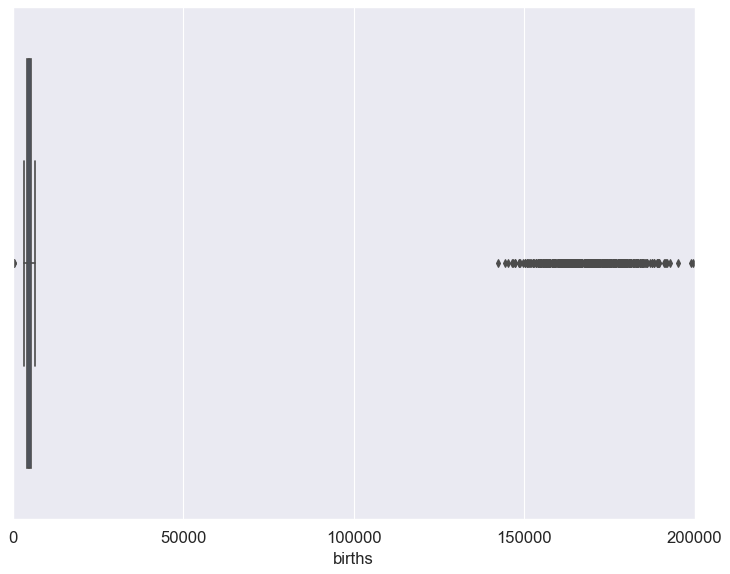

In [230]:
fig = plt.figure(figsize=(11,8))
fig = sns.boxplot(births.births)

C:\Users\Outils\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


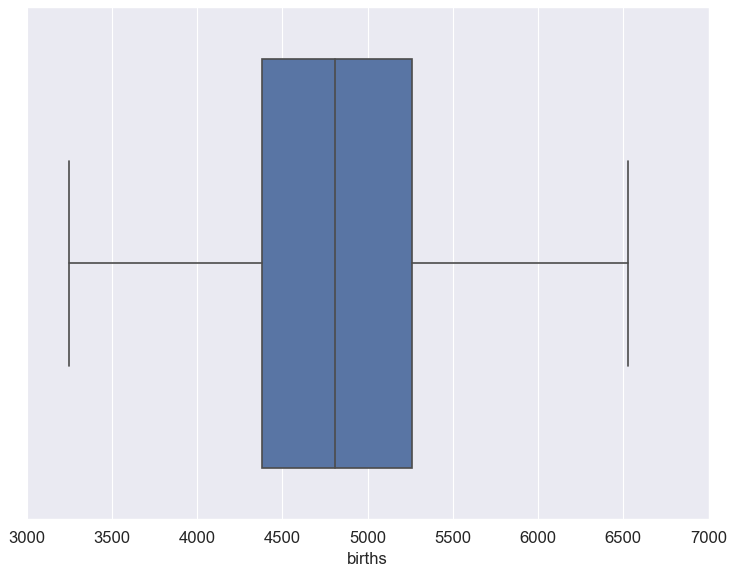

In [231]:
# outliers
births = births.query('(births > 1000) & (births < 100000)')
fig = plt.figure(figsize=(11,8))
fig = sns.boxplot(births.births)

In [232]:
births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14610 entries, 0 to 15066
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    14610 non-null  int64  
 1   month   14610 non-null  int64  
 2   day     14610 non-null  float64
 3   gender  14610 non-null  object 
 4   births  14610 non-null  int64  
 5   decade  14610 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 799.0+ KB


In [233]:
# Days, months and years must be integers.
for field in ["day", "month", "year"]:
    births[field] = births[field].astype(int)

<ipython-input-233-5ff1ae0bcac6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  births[field] = births[field].astype(int)


In [234]:
# create a datetime index from the year, month, day
births.index = pd.to_datetime(10000 * births.year +
100 * births.month +
births.day, format='%Y%m%d')

In [235]:
#  day of week
births['dayofweek'] = births.index.dayofweek

<ipython-input-235-8192be2d9ed1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  births['dayofweek'] = births.index.dayofweek


In [236]:
births

,year,month,day,gender,births,decade,dayofweek
1969-01-01,1969,1,1,F,4046,1960,2
1969-01-01,1969,1,1,M,4440,1960,2
1969-01-02,1969,1,2,F,4454,1960,3
1969-01-02,1969,1,2,M,4548,1960,3
1969-01-03,1969,1,3,F,4548,1960,4
...,...,...,...,...,...,...,...
1988-12-29,1988,12,29,M,5944,1980,3
1988-12-30,1988,12,30,F,5742,1980,4
1988-12-30,1988,12,30,M,6095,1980,4
1988-12-31,1988,12,31,F,4435,1980,5


In [237]:
# nombre de naissance par décade et par jour?
births_per_day = births.pivot_table('births', index='dayofweek',
columns='decade', aggfunc='sum')
births_per_day

decade,1960,1970,1980
dayofweek,,,
0,526638,4895418,4949739
1,549754,5090433,5173612
2,537910,4949892,5045584
3,517742,4903588,5013476
4,531220,4992508,5069502
5,483710,4392927,4214867
6,451604,4154367,4041017


<ipython-input-238-8b24e46b81ee>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])


<Figure size 880x640 with 0 Axes>

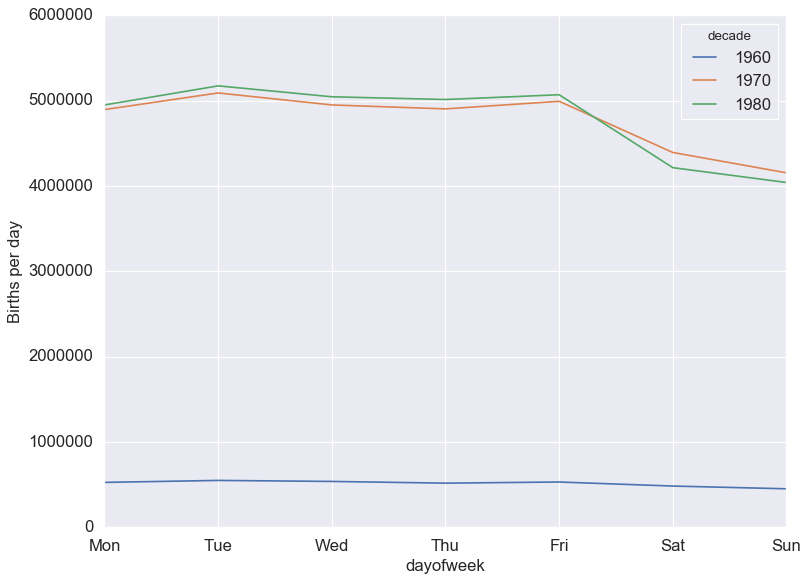

In [238]:
# Visualisation
fig = plt.figure(figsize=(11,8))
births_per_day.plot(figsize=(11,8))
plt.gca().set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.ylabel('Births per day');

In [239]:
# moyenne des naissances par décade et jour?
# nombre de naissance par décade et par jour?
births_per_day = births.pivot_table('births', index='dayofweek',
columns='decade', aggfunc='mean')
births_per_day

decade,1960,1970,1980
dayofweek,,,
0,5063.826923,4689.097701,5276.907249
1,5286.096154,4885.252399,5503.842553
2,5074.622642,4750.376200,5367.642553
3,4978.288462,4696.923372,5333.485106
4,5107.884615,4782.095785,5393.087234
5,4651.057692,4207.784483,4483.901064
6,4342.346154,3979.278736,4308.120469


<ipython-input-240-8b24e46b81ee>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])


<Figure size 880x640 with 0 Axes>

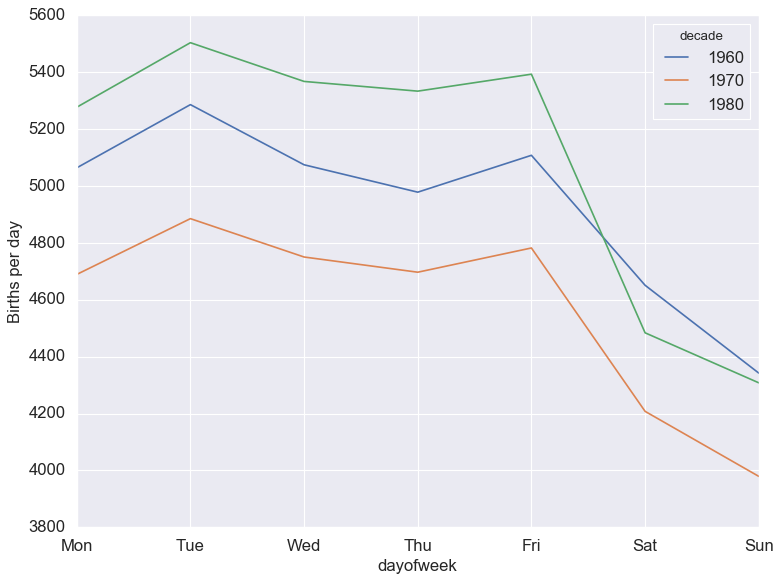

In [240]:
# Visualisation
fig = plt.figure(figsize=(11,8))
births_per_day.plot(figsize=(11,8))
plt.gca().set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.ylabel('Births per day');